In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("chroma_features.csv")
print(df.shape)
df.head()

(1523, 13)


,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label
0,0.077247,0.188314,0.053440,0.212683,0.723530,0.161940,0.021939,0.030549,0.236161,0.785088,0.130416,0.083335,A
1,0.071102,0.430738,0.069206,0.094733,0.572442,0.086841,0.005785,0.009478,0.131720,0.818077,0.138837,0.009091,A
2,0.037523,0.159027,0.031404,0.041088,0.217697,0.037657,0.003623,0.004190,0.164426,0.992217,0.174717,0.027070,A
3,0.233633,0.748782,0.125536,0.212062,0.681549,0.155669,0.028943,0.050679,0.224622,0.519931,0.123941,0.108006,A
4,0.250924,0.272010,0.207126,0.416156,0.890181,0.423935,0.225789,0.317997,0.496362,0.645829,0.458147,0.421073,A


In [4]:
X = df.drop("label",axis = 1)
y = df["label"]

In [5]:
y

0        A
1        A
2        A
3        A
4        A
        ..
1518    Gm
1519    Gm
1520    Gm
1521    Gm
1522    Gm
Name: label, Length: 1523, dtype: object

In [6]:
X

,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.077247,0.188314,0.053440,0.212683,0.723530,0.161940,0.021939,0.030549,0.236161,0.785088,0.130416,0.083335
1,0.071102,0.430738,0.069206,0.094733,0.572442,0.086841,0.005785,0.009478,0.131720,0.818077,0.138837,0.009091
2,0.037523,0.159027,0.031404,0.041088,0.217697,0.037657,0.003623,0.004190,0.164426,0.992217,0.174717,0.027070
3,0.233633,0.748782,0.125536,0.212062,0.681549,0.155669,0.028943,0.050679,0.224622,0.519931,0.123941,0.108006
4,0.250924,0.272010,0.207126,0.416156,0.890181,0.423935,0.225789,0.317997,0.496362,0.645829,0.458147,0.421073
...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0.004236,0.063534,0.390319,0.057739,0.002908,0.004782,0.055380,0.388026,0.081081,0.161209,0.935659,0.139013
1519,0.002865,0.022144,0.144184,0.023641,0.000899,0.001422,0.074013,0.453834,0.071538,0.153205,0.960687,0.160195
1520,0.003120,0.053203,0.297429,0.048412,0.001075,0.003110,0.123188,0.751060,0.116945,0.131057,0.712617,0.124927
1521,0.006322,0.042015,0.226406,0.045681,0.007036,0.005772,0.117568,0.612183,0.091276,0.149517,0.835514,0.133866


In [7]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Number of classes:",len(label_encoder.classes_))

Number of classes: 24


In [8]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y_encoded,
    test_size = 0.2,
    random_state = 42,
    stratify = y_encoded
)
print(X_train.shape,X_test.shape)

(1218, 12) (305, 12)


In [9]:
knn_model = KNeighborsClassifier(
    n_neighbors = 5,
    metric = "euclidean"
)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [10]:
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.8918032786885246


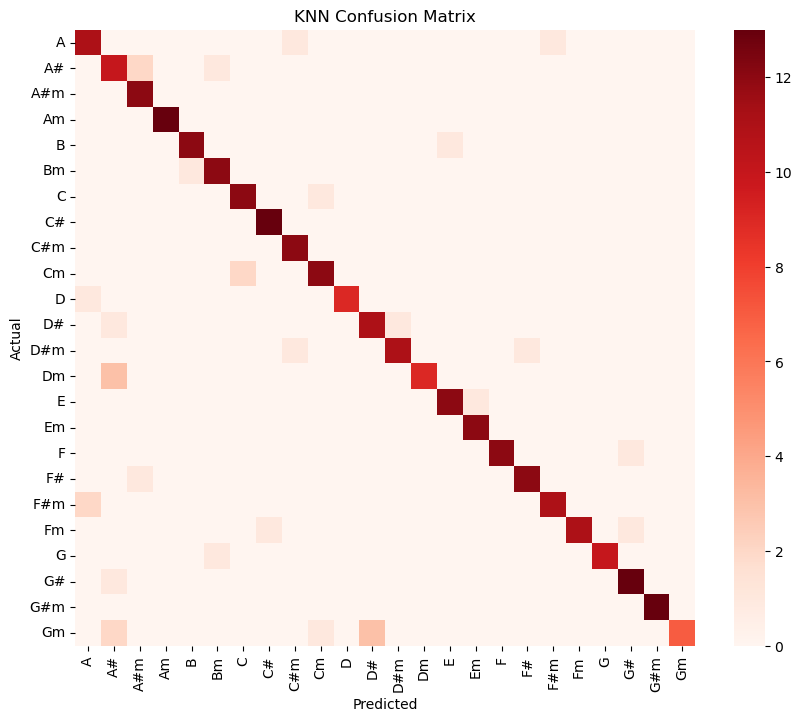

In [11]:
cm = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize = (10,8))
sns.heatmap(
    cm,
    cmap = "Reds",
    xticklabels = label_encoder.classes_,
    yticklabels = label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [12]:
print(classification_report(
    y_test,
    y_pred_knn,
    target_names = label_encoder.classes_
))

              precision    recall  f1-score   support

           A       0.79      0.85      0.81        13
          A#       0.59      0.77      0.67        13
         A#m       0.80      1.00      0.89        12
          Am       1.00      1.00      1.00        13
           B       0.92      0.92      0.92        13
          Bm       0.86      0.92      0.89        13
           C       0.86      0.92      0.89        13
          C#       0.93      1.00      0.96        13
         C#m       0.86      1.00      0.92        12
          Cm       0.86      0.86      0.86        14
           D       1.00      0.90      0.95        10
          D#       0.79      0.85      0.81        13
         D#m       0.92      0.85      0.88        13
          Dm       1.00      0.75      0.86        12
           E       0.92      0.92      0.92        13
          Em       0.92      1.00      0.96        12
           F       1.00      0.92      0.96        13
          F#       0.92    

In [24]:
import joblib
joblib.dump(knn_model,"knn_chord_model.pk1")
joblib.dump(label_encoder,"label_encoder_knn.pk1")
print("KNN model saved successfully")

KNN model saved successfully
